In [1]:
import pandas as pd
df = pd.read_csv("cardinality_benchmark.tsv", sep="\t")

In [2]:
df.rename(columns={
    "hll": "approximation"
}, inplace=True)
df

,precision,bits,exact,approximation,set
0,4,1,6322027,1.806453e+01,NaN
1,4,2,6322027,8.614400e+01,NaN
2,4,3,6322027,1.378304e+03,NaN
3,4,4,6322027,3.528458e+05,NaN
4,4,5,6322027,6.123968e+06,NaN
...,...,...,...,...,...
835,17,2,6320623,7.563259e+05,NaN
836,17,3,6320623,5.673426e+06,NaN
837,17,4,6320623,6.309543e+06,NaN
838,17,5,6320623,6.309548e+06,NaN


In [3]:
df["memory"] = 2**df.precision * df.bits
df["label"] = "HLL"

In [4]:
df["squared_error"] = (df.exact - df.approximation)**2
data_hll = df.groupby(["precision", "bits", "memory"])["squared_error"].agg(["mean", "std"])
data_hll = data_hll.reset_index()
data_hll

,precision,bits,memory,mean,std
0,4,1,16,3.995576e+13,9.602536e+09
1,4,2,32,3.995490e+13,9.602433e+09
2,4,3,48,3.993857e+13,9.600470e+09
3,4,4,64,3.561976e+13,9.066520e+09
4,4,5,80,1.066417e+12,1.579815e+12
...,...,...,...,...,...
79,17,2,262144,3.096641e+13,8.463581e+09
80,17,3,393216,4.153913e+11,1.390349e+10
81,17,4,524288,2.717233e+08,4.669639e+08
82,17,5,655360,2.716103e+08,4.668106e+08


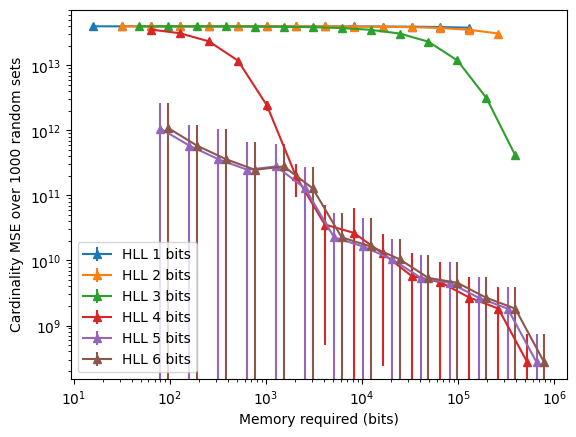

In [5]:
import matplotlib.pyplot as plt

for bits in data_hll["bits"].unique():
    filtered = data_hll[data_hll.bits == bits]
    plt.errorbar(
        filtered.memory,
        filtered["mean"],
        filtered["std"],
        marker='^',
        label=f"HLL {bits} bits"
    )
if False:
    plt.errorbar(
        data_minhash.memory,
        data_minhash["mean"],
        data_minhash["std"],
        marker='^',
        label="MinHash",
        alpha=0.7
    )
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Cardinality MSE over 1000 random sets")
plt.xlabel("Memory required (bits)")
plt.show()

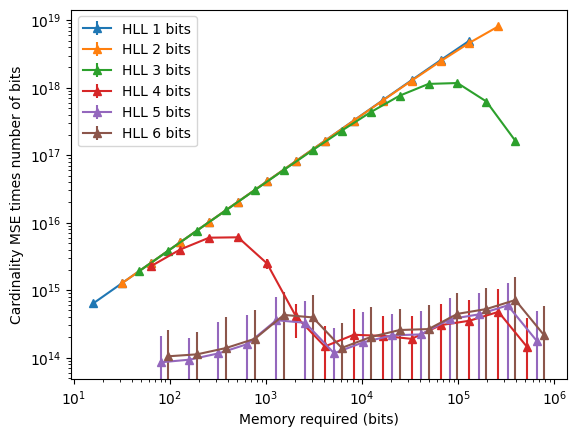

In [6]:
import matplotlib.pyplot as plt


for bits in data_hll["bits"].unique():
    filtered = data_hll[data_hll.bits == bits]
    plt.errorbar(
        filtered.memory,
        filtered["mean"] * filtered.memory,
        filtered["std"] * filtered.memory,
        marker='^',
        label=f"HLL {bits} bits"
    )

if False:
    plt.errorbar(
        data_minhash.memory,
        data_minhash["mean"] * data_minhash.memory,
        data_minhash["std"] * data_minhash.memory,
        marker='^',
        label="MinHash",
        alpha=0.7
    )
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Cardinality MSE times number of bits")
plt.xlabel("Memory required (bits)")
plt.show()